In [1]:
import glob
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
def parse_short_name(x):
    return x.network_name.split('/')[-2].split('_')[0]

In [3]:
p2v_results = pd.read_csv('graph/p2v_result.tsv', sep='\t')
p2v_results.columns = ['network_name', 'lambda', 'dim', 'roc_auc']
p2v_results['short_name'] = p2v_results.apply(parse_short_name, axis=1)
network_names = set(p2v_results['short_name'])
p2v_summaries = {}
for network_name in network_names:
    temp_df = p2v_results[p2v_results.short_name == network_name]
    grouped = temp_df.groupby(['lambda', 'dim'])
    summary = {(np.round(row[0][0], 2), row[0][1]):(np.mean(row[1]['roc_auc']), sem(row[1]['roc_auc'])) for row in grouped}
    p2v_summaries[network_name] = summary

In [4]:
n2v_results = pd.read_csv('graph/n2v_result.tsv', sep='\t')
n2v_results.columns = ['network_name', 'dim', 'roc_auc']
n2v_results['short_name'] = n2v_results.apply(parse_short_name, axis=1)
# only display dim = 128
n2v_results = n2v_results[n2v_results.dim == 128]
n2v_summaries = {}
for network_name in network_names:
    temp_df = n2v_results[n2v_results.short_name == network_name]
    n2v_summaries[network_name] = np.mean(temp_df['roc_auc'])

In [5]:
n2v_logistic_results = pd.read_csv('graph/n2v_logistic_result.tsv', sep='\t')
n2v_logistic_results.columns = ['network_name', 'dim', 'roc_auc']
n2v_logistic_results['short_name'] = n2v_logistic_results.apply(parse_short_name, axis=1)
# only display dim = 128
n2v_logistic_results = n2v_logistic_results[n2v_logistic_results.dim == 128]
n2v_logistic_summaries = {}
for network_name in network_names:
    temp_df = n2v_logistic_results[n2v_logistic_results.short_name == network_name]
    n2v_logistic_summaries[network_name] = np.mean(temp_df['roc_auc'])

In [6]:
def parse_short_name_for_splitter(x):
    return x.network_name.split('_')[0]

In [7]:
splitter_results = pd.read_csv('graph/splitter_result.tsv', sep='\t')
splitter_results.columns = ['network_name', 'roc_auc']
splitter_results['short_name'] = splitter_results.apply(parse_short_name_for_splitter, axis=1)
splitter_summaries = {}
for network_name in network_names:
    temp_df = splitter_results[splitter_results.short_name == network_name]
    splitter_summaries[network_name] = np.mean(temp_df['roc_auc'])

In [8]:
splitter_one_epoch_results = pd.read_csv('graph/splitter_one_epoch_result.tsv', sep='\t')
splitter_one_epoch_results.columns = ['network_name', 'roc_auc']
splitter_one_epoch_results['short_name'] = splitter_one_epoch_results.apply(parse_short_name_for_splitter, axis=1)
splitter_one_epoch_summaries = {}
for network_name in network_names:
    temp_df = splitter_one_epoch_results[splitter_one_epoch_results.short_name == network_name]
    splitter_one_epoch_summaries[network_name] = np.mean(temp_df['roc_auc'])

In [9]:
display_name_to_data_name = {
    'PPI': 'ppi',
    'ca-HepTh': 'ca-HepTh',
    'ca-AstroPh': 'ca-AstroPh',
    'wiki-vote': 'wiki-vote',
    'soc-epinions': 'sos-epinions' #for tyop
}

In [10]:
display_name = ['PPI', 'ca-HepTh', 'ca-AstroPh', 'wiki-vote', 'soc-epinions']
p2v_values = [p2v_summaries[display_name_to_data_name[name]]for name in display_name]
n2v_values = [n2v_summaries[display_name_to_data_name[name]]for name in display_name]
n2v_logistics_values = [n2v_logistic_summaries[display_name_to_data_name[name]]for name in display_name]
splitter_values = [splitter_summaries[display_name_to_data_name[name]]for name in display_name]
splitter_one_epoch_values= [splitter_one_epoch_summaries[display_name_to_data_name[name]]for name in display_name]

In [11]:
dims = [8, 16, 32, 64, 128]
lambds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

/u/yoonjis/python3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


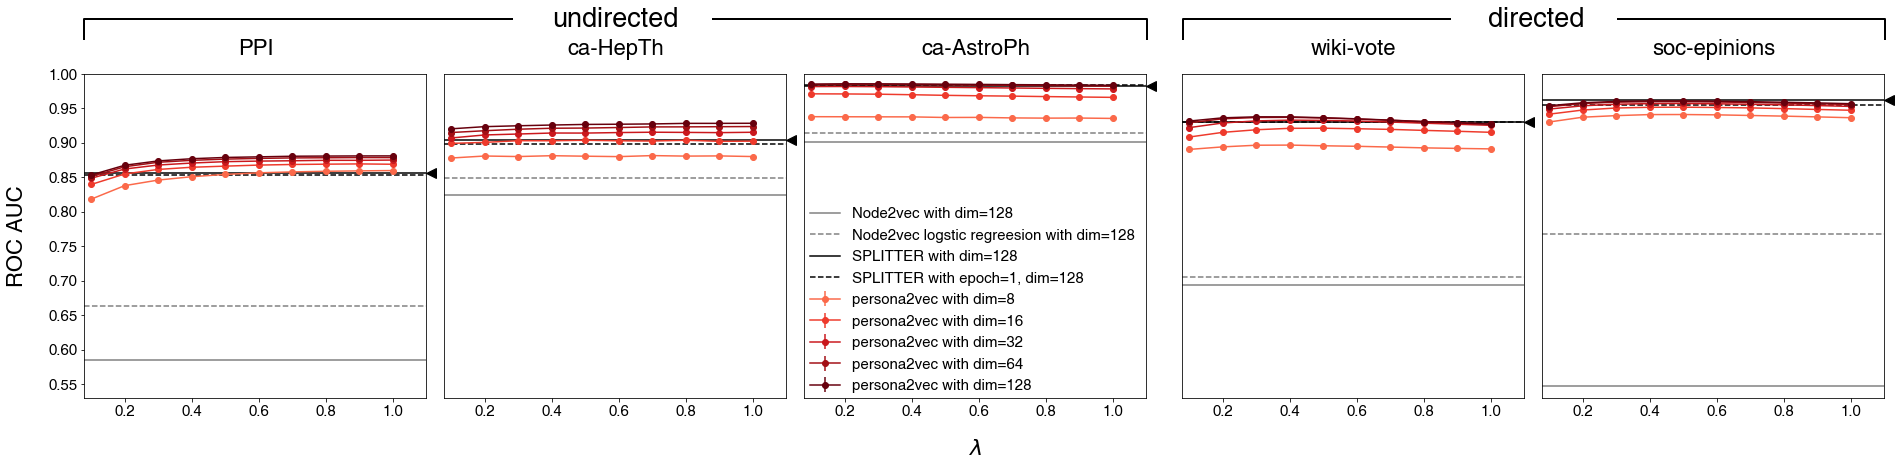

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.gridspec as gridspec

path = INPUT_FONT_PATH_HERE #for anonymization
prop = font_manager.FontProperties(fname=path, size=22)
small_prop = font_manager.FontProperties(fname=path, size=15)
medium_prop = font_manager.FontProperties(fname=path, size=27)
c_lst = [plt.cm.Reds(a) for a in np.linspace(0.5, 1.0, len(dims))]


# All have the same lower border, height and width, only the distance to
# the left end of the figure differs
bottom = 0.05
height = 0.9
width = 0.95
left1, left2, left3, left4, left5 = 0,1,2,3,4

rectangle1 = [left1, bottom, width, height]
rectangle2 = [left2, bottom, width, height]
rectangle3 = [left3, bottom, width, height]
rectangle4 = [left4 + 0.05, bottom, width, height]
rectangle5 = [left5 + 0.05, bottom, width, height]

# Create a 5 x 5 (quadratic) figure
fig = plt.figure(1, figsize=(5, 5))

ax1 = plt.axes(rectangle1)
ax2 = plt.axes(rectangle2, sharey=ax1)
ax3 = plt.axes(rectangle3, sharey=ax1)
ax4 = plt.axes(rectangle4, sharey=ax1)
ax5 = plt.axes(rectangle5, sharey=ax1)
axs = [ax1, ax2, ax3, ax4, ax5]

for ax in axs[1:]:
    ax.get_yaxis().set_visible(False)

# Let's display something in these axes.
for ax,  p2v_value_dict, n2v_value, n2v_logistics_value, splitter_value, splitter_one_epoch_value, name in zip(axs, p2v_values, n2v_values, n2v_logistics_values, splitter_values, splitter_one_epoch_values, display_name):
    for dim, c in zip(dims,c_lst):
        xs = lambds
        ys = [p2v_value_dict[lambd,dim][0] for lambd in lambds]
        es = [p2v_value_dict[lambd,dim][1] for lambd in lambds]
        ax.errorbar(xs,ys,es, label='persona2vec with dim=' + str(dim),fmt='o-',  c=c)
    ax.axhline(y=n2v_value, label='Node2vec with dim=128', linestyle='-', c='grey')
    ax.axhline(y=n2v_logistics_value, label='Node2vec logstic regreesion with dim=128', linestyle='--', c='grey')
    ax.axhline(y=splitter_value, label='SPLITTER with dim=128', linestyle='-', c='black')  
    ax.plot([1.115], [splitter_value], '<', markersize=10, clip_on=False, c='black')
    ax.axhline(y=splitter_one_epoch_value, label='SPLITTER with epoch=1, dim=128', linestyle='--', c='black')
        
        
    ax.set_title(name, fontproperties=prop,  y= 1.04)   
for ax in axs:
    ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticks([0,50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
    for label in ax.get_xticklabels():
        label.set_fontproperties(small_prop)
    for label in ax.get_yticklabels():
        label.set_fontproperties(small_prop)
    ax.set_ylim((0.53, 1.0))
    ax.set_xlim((0.08, 1.1))
axs[2].set_xlabel(r'$\lambda$',fontproperties=prop, labelpad=20)
axs[0].set_ylabel('ROC AUC',fontproperties=prop, labelpad=20)

width=0.3
top = 1.08
bottom = 1.05
axs[0].plot([0.08, 0.08, 1.655-width], [bottom, top, top], '-', linewidth=2, clip_on=False, c='black')
axs[0].plot([1.655+width, 3.25, 3.25], [top, top, bottom], '-', linewidth=2, clip_on=False, c='black')
fig.text(1.3,1.08, 'undirected', fontproperties=medium_prop)

start = 3.355
end = 5.45
width=0.25
med = (start + end) / 2
axs[0].plot([start, start, med -width], [bottom, top, top], '-', linewidth=2, clip_on=False, c='black')
axs[0].plot([med+width, end, end], [top, top, bottom], '-', linewidth=2, clip_on=False, c='black')
fig.text(3.9,1.08, 'directed', fontproperties=medium_prop)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels,  bbox_to_anchor=(3.19,0.76), prop=small_prop,frameon=False)
fig.tight_layout()
plt.savefig('performance_analysis.pdf', bbox_inches='tight')
plt.show()
